# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [11]:
# Generate uppercase alphabets
uppercase_alphabets = [chr(i) for i in range(65, 91)]
print("Uppercase Alphabets:", uppercase_alphabets)

Uppercase Alphabets: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [12]:
def F(n):
    for i in range(n):
        dashs = (n-i-1)*'-'
        alpha = ""
        for j in range(i):
            alpha += uppercase_alphabets[i - j]
        for j in range(i + 1):
            alpha += uppercase_alphabets[j]   
        print(f"{dashs}{alpha}{dashs}") 

# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [15]:
def ascend(x : list):
    leng = len(x)
    ordered = []
    for j in range(leng):
        max = x[0]
        for i in range(len(x)):
            if x[i] >= max:
                max = x[i]
        ordered.append(max)
        x.remove(max)
    ordered.reverse()
    return ordered

def F(d : dict):
    lis = []
    for i in d.keys():
        lis.append(i)
    ascen = ascend(lis)
    print("key values ascending")
    for i in ascen:
        print(f"-{i}-,-{d[i][0]}-,-{d[i][1]}-")

    for i in d.values():
        lis.append(i[0])
    print("x values descending")
    descen = ascend(lis)
    descen.reverse()
    for i in range(len(descen)):
        for j in range(4):
            if descen[i] == list(d.values())[j][0]:
                print(f"-{list(d.keys())[j]}-,-{list(d.values())[j][0]}-,-{list(d.values())[j][1]}-")
                break
    
    for i in d.values():
        lis.append(i[1])
    print("y values ascending")
    ascen1 = ascend(lis)
    for i in range(len(ascen1)):
        for j in range(4):
            if ascen1[i] == list(d.values())[j][1]:
                print(f"-{list(d.keys())[j]}-,-{list(d.values())[j][0]}-,-{list(d.values())[j][1]}-")
                del d[list(d.keys())[j]]
                break

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

key values ascending
-1-,-1-,-2-
-2-,--1-,-4-
-4-,-2-,-3-
-5-,--4-,-3-
x values descending
-4-,-2-,-3-
-1-,-1-,-2-
-2-,--1-,-4-
-5-,--4-,-3-
y values ascending
-1-,-1-,-2-
-5-,--4-,-3-
-4-,-2-,-3-
-2-,--1-,-4-
key values ascending
--8-,-4-,-2-
-5-,-9-,--10-
-6-,--3-,-4-
-7-,-2-,-1-
x values descending
-5-,-9-,--10-
--8-,-4-,-2-
-7-,-2-,-1-
-6-,--3-,-4-
y values ascending
-5-,-9-,--10-
-7-,-2-,-1-
--8-,-4-,-2-
-6-,--3-,-4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [1]:
import pandas as pd
df = pd.read_csv("student_records.csv")
df.iloc[:10]

,roll_number,department,credit,course_name,course_type,grade
0,588946,MA,3,EC250,hasmed_elective,AB
1,145372,EP,4,EP407,hasmed_elective,CC
2,834515,MA,8,EP885,hasmed_elective,BB
3,344265,CSE,6,CSE699,honours,AB
4,358405,MA,3,EE460,minor,AP
5,781075,CE,8,CE540,honours,CC
6,180828,CSE,6,CE880,minor,AB
7,981238,MM,4,CSE226,minor,AB
8,836881,MM,8,MM530,core,AA
9,310604,EE,8,EE202,core,AB


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [10]:
sorted_data = df.sort_values(by='roll_number', ascending=True)
roll_nums = set(df['roll_number'].to_list())
convert = {'AP':10, 'AA':10, 'AB':9, 'BB':8, 'BC':7, 'CC':6}
for i in roll_nums:
    credit = 0
    cpi = 0
    for j in range(len(sorted_data['roll_number'])):
        if sorted_data['roll_number'][j] == i:
            credit += sorted_data['credit'][j]
            cpi += sorted_data['credit'][j]*convert[sorted_data['grade'][j]]
    cpi = cpi/credit
    print(f"Roll num: {i}, Total credit: {credit}, CPI: {cpi}")

Roll num: 358405, Total credit: 206, CPI: 8.587378640776699
Roll num: 194063, Total credit: 157, CPI: 8.140127388535031
Roll num: 879634, Total credit: 203, CPI: 8.738916256157635
Roll num: 613401, Total credit: 209, CPI: 8.440191387559809
Roll num: 681499, Total credit: 234, CPI: 8.256410256410257
Roll num: 928288, Total credit: 191, CPI: 8.513089005235603
Roll num: 199713, Total credit: 172, CPI: 8.290697674418604
Roll num: 970791, Total credit: 220, CPI: 8.122727272727273
Roll num: 993835, Total credit: 175, CPI: 8.434285714285714
Roll num: 788020, Total credit: 193, CPI: 8.015544041450777
Roll num: 888886, Total credit: 207, CPI: 8.270531400966183
Roll num: 138296, Total credit: 200, CPI: 8.275
Roll num: 301135, Total credit: 206, CPI: 8.325242718446601
Roll num: 721490, Total credit: 235, CPI: 8.34468085106383
Roll num: 207443, Total credit: 161, CPI: 8.304347826086957
Roll num: 851029, Total credit: 161, CPI: 8.322981366459627
Roll num: 381526, Total credit: 160, CPI: 8.425
Roll 

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [13]:
for i in roll_nums:
    core = 0
    elective = 0
    flexible = 0
    hasmed = 0
    for j in range(len(sorted_data['course_type'])):
        if sorted_data['roll_number'][j]==i and sorted_data['course_type'][j] == "core":
            core += sorted_data['credit'][j]
        elif sorted_data['roll_number'][j]==i and sorted_data['course_type'][j] == "department_elective":
            elective += sorted_data['credit'][j]
        elif sorted_data['roll_number'][j]==i and sorted_data['course_type'][j] == "flexible_elective":
            flexible += sorted_data['credit'][j]
        elif sorted_data['roll_number'][j]==i and sorted_data['course_type'][j] == "hasmed_elective":
            hasmed += sorted_data['credit'][j]
    if core >= 20 and elective >= 15 and flexible >= 10 and hasmed >= 5:
        print(i)


879634
681499
928288
970791
888886
721490
207443
379479
180828
692318
485484
628849
144528
588946
461971
283796
391848
750259
608952
716985
265922
517837
159438
488661
581858
534763
981238
124663
214270
608522
836881
781075
143142
630568
294697
381227
782129
845623
482623
881983
871746
310604
626000
773982
973158
388969
955757
810863
282482
971123
521087
571782
960395
572815
998293
703403
500658
203200
986057
581065
327122
834515
150503
362471
143856
787967


#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [21]:
print(set(sorted_data['department']))
# Finding students of CE department having atleast 10 credits with minor tag
print("Students of CE department having atleast 10 credits of minor tag")
for i in roll_nums:
    minor = 0
    for j in range(len(sorted_data['course_type'])):
        if sorted_data['roll_number'][j]==i and sorted_data['department'][j] == "CE" and sorted_data['course_type'][j] == "minor":
            minor += sorted_data['credit'][j]
    if minor >= 10:
        print(i)
# Finding students of CSE department having atleast 10 credits with minor tag
print("Students of CSE department having atleast 10 credits of minor tag")
for i in roll_nums:
    minor = 0
    for j in range(len(sorted_data['course_type'])):
        if sorted_data['roll_number'][j]==i and sorted_data['department'][j] == "CSE" and sorted_data['course_type'][j] == "minor":
            minor += sorted_data['credit'][j]
    if minor >= 10:
        print(i)

{'CE', 'CSE', 'MA', 'IE', 'ME', 'EE', 'EC', 'CH', 'EP', 'MM'}
Students of CE department having atleast 10 credits of minor tag
613401
993835
788020
888886
381526
461971
781075
381227
810863
478606
500658
143856
Students of CSE department having atleast 10 credits of minor tag
851029
180828
692318
907454
344265
143142
597353
388969
521087
572815


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [22]:
for i in roll_nums:
    honours = 0
    core = 0
    for j in range(len(sorted_data['course_type'])):
        if sorted_data['roll_number'][j]==i and sorted_data['course_type'][j] == "core":
            core += sorted_data['credit'][j]
        elif sorted_data['roll_number'][j]==i and sorted_data['course_type'][j] == "honours":
            honours += sorted_data['credit'][j]
    if honours >= 10 and core >= 20:
        print(i)

879634
613401
681499
928288
199713
970791
788020
888886
721490
207443
379479
465496
692318
485484
628849
364146
144528
588946
461971
283796
391848
718510
750259
608952
716985
265922
517837
159438
488661
589528
581858
208100
534763
870642
124663
214270
582912
608522
836881
781075
143142
630568
294697
782129
845623
482623
881983
871746
310604
626000
773982
973158
388969
955757
810863
282482
971123
521087
571782
960395
572815
998293
703403
500658
203200
986057
581065
327122
834515
458200
145372
150503
362471
143856
787967


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [23]:
import numpy as np
from scipy.optimize import minimize, NonlinearConstraint
def f(x):
    return 2*(x[0]-x[1]-3)**2 + 4*(x[0]+2*x[1]+1)**4

def con1(x):
    return x[0] - x[1] + 3

def con2(x):
    return (x[0]+2)**2 + (x[1]+1)**2 - 5

nonlinear_con1 = NonlinearConstraint(con1, 0, np.inf)
nonlinear_con2 = NonlinearConstraint(con2, -5, 0)
x0 = [-1, 0]
result = minimize(f, x0, method='trust-constr', constraints=[nonlinear_con1, nonlinear_con2])
# Print results
print("Optimal solution:", result.x)
print("Objective value at optimal solution:", result.fun)

Optimal solution: [ 0.23492503 -0.92851485]
Objective value at optimal solution: 7.3450262273319185


/Users/vineetjangir/anaconda3/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [26]:
from scipy.integrate import quad
import numpy as np

r = np.sqrt(3)

def x(t):
    return r*np.cos(t)
def y(t):
    return r*np.sin(t)
def f(t):
    return x(t)**2 + y(t)**4
def ds(t):
    return r

def integrand(t):
    return f(t)*ds(t)

result, error = quad(integrand, 0, 2 * np.pi)

print("Line integral value:", result)
print("Integration error estimate:", error)

Line integral value: 53.05363140385086
Integration error estimate: 5.3768447472180014e-09


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [27]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [39]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = np.loadtxt(data_path, delimiter=',')
    return data


In [30]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        indices = np.random.choice(len(data), size=K, replace=False)
        centers = data[indices]
    else:
        centers = init_centers
    return centers

In [31]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    labels = np.ones(len(data))
    return labels

In [32]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    return distances

In [33]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    return labels

In [34]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    new_centers = np.array([data[labels == k].mean(axis=0) for k in range(K)])
    return new_centers


In [35]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [36]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [37]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')
    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')
    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')
    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0004200935363769531


<module 'matplotlib.pyplot' from '/Users/vineetjangir/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

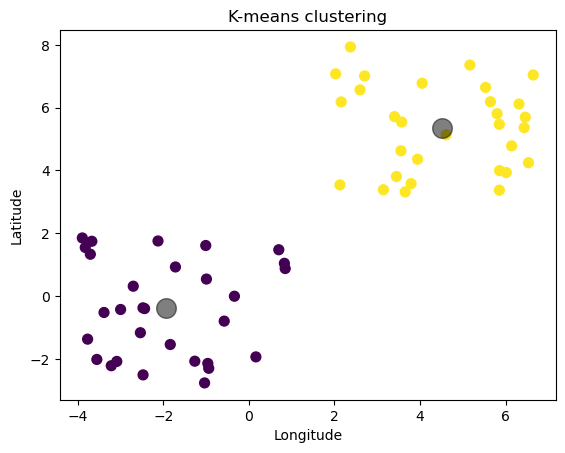

In [41]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)